In [1]:
from matplotlib import image
from skimage import util
import os
from skimage.color import rgb2gray
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set(style="white")

In [2]:
def draw_symbols(symbols):
    n = len(symbols)
    fig, ax = plt.subplots(nrows=1, ncols=n, figsize=(n,1), sharex="all", sharey="all")
    
    for i,s in enumerate(symbols):
        ax[i].imshow(s.reshape(28,28), cmap = matplotlib.cm.binary, interpolation="nearest")
    
    for a in ax:
        a.axis("off")

In [3]:
plusevi = []
for photo in os.listdir("Slike/Plus"):
    plusevi.append(image.imread("Slike/Plus/"+photo))
    
plusevi = np.array(plusevi)
plusevi = util.invert(rgb2gray(plusevi))

In [4]:
minusi = []
for photo in os.listdir("Slike/Minus"):
    minusi.append(image.imread("Slike/Minus/"+photo))
    
minusi = np.array(minusi)
minusi = util.invert(rgb2gray(minusi))

In [5]:
puta = []
for photo in os.listdir("Slike/Puta"):
    puta.append(image.imread("Slike/Puta/"+photo))
    
puta = np.array(puta)
puta = util.invert(rgb2gray(puta))

In [6]:
dijeljeno = []
for photo in os.listdir("Slike/Dijeljeno"):
    dijeljeno.append(image.imread("Slike/Dijeljeno/"+photo))
    
dijeljeno = np.array(dijeljeno)
dijeljeno = util.invert(rgb2gray(dijeljeno))

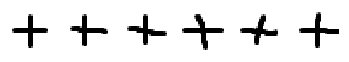

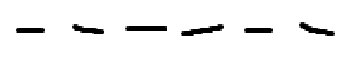

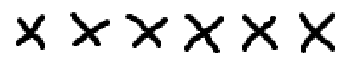

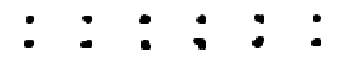

In [7]:
draw_symbols(plusevi)
draw_symbols(minusi)
draw_symbols(puta)
draw_symbols(dijeljeno)

In [8]:
from scipy.ndimage.interpolation import rotate
from scipy.ndimage.interpolation import shift
from skimage.filters import threshold_mean

In [9]:
def generate_symbols(symbols):
    rotated = []
    for s in symbols:
        for i in range(-5,5):
            rotated.append(rotate(s,i, reshape=False))
    rotated = np.array(rotated)

    thresh = threshold_mean(rotated)
    rotated = rotated > thresh

    translated = []
    for s in symbols:
        for i in range(-2,2):
            for j in range(-2,2):
                translated.append(shift(s, [i,j], cval=0))
    translated = np.array(translated)

    combined = []
    for s in rotated:
        for i in range(-2,2):
            for j in range(-2,2):
                combined.append(shift(s, [i,j], cval=0))
    combined = np.array(combined)

    rotated = rotated.reshape(len(rotated),28*28)
    translated = translated.reshape(len(translated),28*28)
    combined = combined.reshape(len(combined),28*28)
    #draw_symbols(rotirani)
    #draw_symbols(translatirani)
    generated_symbols = np.append(rotated,translated, axis=0)
    generated_symbols = np.append(generated_symbols,combined, axis=0)
    return generated_symbols

In [10]:
gen_plus = generate_symbols(plusevi)
gen_minus = generate_symbols(minusi)
gen_puta = generate_symbols(puta)
gen_dijeljeno = generate_symbols(dijeljeno)

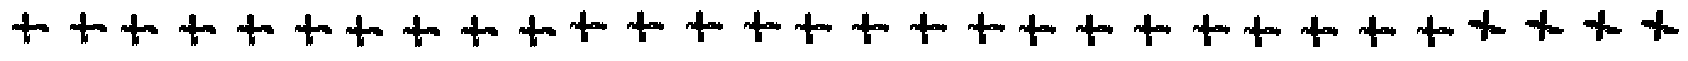

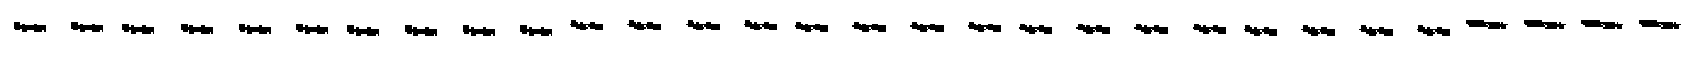

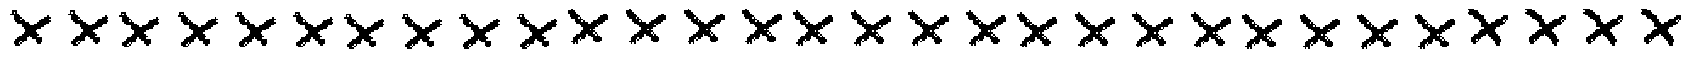

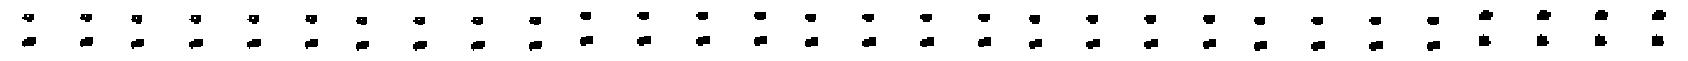

In [11]:
draw_symbols(gen_plus[450:480])
draw_symbols(gen_minus[450:480])
draw_symbols(gen_puta[450:480])
draw_symbols(gen_dijeljeno[450:480])

In [12]:
y_plus = np.array([[0,0,0,0,0,0,0,0,0,0,1,0,0,0]]*len(gen_plus))
y_minus = np.array([[0,0,0,0,0,0,0,0,0,0,0,1,0,0]]*len(gen_minus))
y_puta = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,1,0]]*len(gen_puta))
y_dijeljeno = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,1]]*len(gen_dijeljeno))

In [13]:
symbols = np.vstack((gen_plus, gen_minus, gen_puta, gen_dijeljeno))
labels = np.vstack((y_plus,y_minus,y_puta,y_dijeljeno))

In [14]:
data = {"data": symbols,
        "target": labels}

import joblib
joblib.dump(data, "operation_symbols.pkl")

['operation_symbols.pkl']